In [1]:
from bs4 import BeautifulSoup as bs # used for web scraping
import requests # A Http request is used to either retrieve data from a specified URI or to push data to a server.
import json # to store data but this was not able to store python object 
import re # used for string searching and manipulation
import pickle # used for serializing and de-serializing a Python object structure, any object pickled to save in disk.
from datetime import datetime # objects which actually manipulating objects(date,datetime) and not string or timestamps.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Get Info Box for one Movie

## Load the webpage

In [2]:
r = requests.get("https://en.wikipedia.org/wiki/Toy_Story_3")
# Convert to a beautiful soup object
soup = bs(r.content)
# Print out the HTML
contents = soup.prettify()
#print(contents)

###### go to webpage and right click on the line that we want to inspect , then go and check what is in our inspect like class name table name etc.

## Get table row of box 

In [3]:
info_box = soup.find(class_="infobox vevent")
info_rows = info_box.find_all("tr") # rows of the table
for row in info_rows:
    print(row.prettify())

<tr>
 <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
  Toy Story 3
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <a class="image" href="/wiki/File:Toy_Story_3_poster.jpg" title="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3.">
   <img alt="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3." class="thumbborder" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg" width="220"/>
  </a>
  <div class="infobox-caption">
   Theatrical release poster
  </div>
 </td>
</tr>

<tr>
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">
  Directed by
 </th>
 <td class="

## Store all info of movie in dictionary 

In [4]:
#***************************** save info into dictionary ********************************#

# make text clean like remove \n, \xa0 etc.
def get_content_value(row_data):
    if row_data.find("li"): # if row has list in data
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
    else: # if data doesn't have list then it contain text
        return row_data.get_text(" ", strip=True).replace("\xa0", " ")

movie_info = {}
for index, row in enumerate(info_rows):
    if index == 0: # first row should be title 
        movie_info['title'] = row.find("th").get_text(" ", strip=True)
    elif index == 1:# Second row is image
        continue
    else: # other content of movie 
        content_key = row.find("th").get_text(" ", strip=True)
        content_value = get_content_value(row.find("td"))
        movie_info[content_key] = content_value
    
movie_info

{'title': 'Toy Story 3',
 'Directed by': 'Lee Unkrich',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Produced by': 'Darla K. Anderson',
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Music by': 'Randy Newman',
 'Production companies': ['Walt Disney Pictures', 'Pixar Animation Studios'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release date': ['June 12, 2010 ( 2010-06-12 ) ( Taormina Film Fest )',
  'June 18, 2010 ( 2010-06-18 ) (United States)'],
 'Running time': '103 minutes [1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million [1]',
 'Box office': '$1.067 billion [1]'}

# Get info box for all movies

In [5]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")
# Convert to a beautiful soup object
soup = bs(r.content)
# Print out the HTML
contents = soup.prettify()
#print(contents)

## Analysis Webpage 

In [6]:
# selector select from class like class1.class2.class3. etc 
movies = soup.select(".wikitable.sortable i") # getting all italic(i) link data from class wikitable sortable 
print(movies[0:10])
# here we see that there is reference link here (href) and title (in text format) separating information
print("\n") 
for movie in movies[0:10]:
    # getting link
    print("*********************************")
    print(movies[0].a["href"])
    # getting title of starting 10 movies
    print(movies[0].a["title"])

[<i><a href="/wiki/Academy_Award_Review_of_Walt_Disney_Cartoons" title="Academy Award Review of Walt Disney Cartoons">Academy Award Review of Walt Disney Cartoons</a></i>, <i><a href="/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)" title="Snow White and the Seven Dwarfs (1937 film)">Snow White and the Seven Dwarfs</a></i>, <i><a href="/wiki/Pinocchio_(1940_film)" title="Pinocchio (1940 film)">Pinocchio</a></i>, <i><a href="/wiki/Fantasia_(1940_film)" title="Fantasia (1940 film)">Fantasia</a></i>, <i><a href="/wiki/The_Reluctant_Dragon_(1941_film)" title="The Reluctant Dragon (1941 film)">The Reluctant Dragon</a></i>, <i><a href="/wiki/Dumbo" title="Dumbo">Dumbo</a></i>, <i><a href="/wiki/Bambi" title="Bambi">Bambi</a></i>, <i><a href="/wiki/Saludos_Amigos" title="Saludos Amigos">Saludos Amigos</a></i>, <i><a href="/wiki/Victory_Through_Air_Power_(film)" title="Victory Through Air Power (film)">Victory Through Air Power</a></i>, <i><a href="/wiki/The_Three_Caballeros" title="The Thre

## Make dict to store all info of movie

In [7]:
def get_content_value(row_data):
    if row_data.find("li"): # if row has list in data
        # strip is used to strip whitespace from the beginning and end of each bit of text.
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
    elif row_data.find("br"):
        return [text for text in row_data.stripped_strings]
    else: # if data doesn't have list then it contain text
        return row_data.get_text(" ", strip=True).replace("\xa0", " ")

def clean_tags(soup): # sup(superscript) to remove reference mark like [1],[2] and span for removeing extra written date
    for tag in soup.find_all(["sup", "span"]):
        tag.decompose() # removes a tag from the tree, then completely destroys it.
        
def get_info_box(url):
    r = requests.get(url) # request the url to get info
    soup = bs(r.content)  # using beautiful soap to get content of link
    info_box = soup.find(class_="infobox vevent") # getting class of url link 
    info_rows = info_box.find_all("tr") # find row of data 
    clean_tags(soup) # to remove tag like reference and 2 time written date like feb 2 ,2019 (2-2-2019)
    
    movie_info = {}
    for index, row in enumerate(info_rows):
        if index == 0:  # first row should be title 
            movie_info['title'] = row.find("th").get_text(" ", strip=True)
        else: # getting other content of movie that have header of table 
            header = row.find('th')
            if header: # if header is not None then run this
                content_key = row.find("th").get_text(" ", strip=True) # find header(give key) of table and then get text of that
                content_value = get_content_value(row.find("td")) # get clean data of table 
                movie_info[content_key] = content_value
            
    return movie_info    

In [8]:
# Check one Example
get_info_box("https://en.wikipedia.org/wiki/One_Little_Indian_(film)")

{'title': 'One Little Indian',
 'Directed by': 'Bernard McEveety',
 'Written by': 'Harry Spalding',
 'Produced by': 'Winston Hibler',
 'Starring': ['James Garner',
  'Vera Miles',
  'Pat Hingle',
  'Morgan Woodward',
  'Jodie Foster'],
 'Cinematography': 'Charles F. Wheeler',
 'Edited by': 'Robert Stafford',
 'Music by': 'Jerry Goldsmith',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['June 20, 1973'],
 'Running time': '90 Minutes',
 'Country': 'United States',
 'Language': 'English',
 'Box office': '$2 million'}

# Load List of Walt Disney Picture Films 

## Path of Wiki Page 

In [9]:
# make a dataset for all disney pictures 
r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films") # request the url to get info
soup = bs(r.content)  # using beautiful soap to get content of link
# getting all info in wikitable.sortable class having all i (italic) with
# ---> here a give link and title of all disney movies listed in table 
movies = soup.select(".wikitable.sortable i a") 
# base path i.e. wikipedia page 
base_path = "https://en.wikipedia.org/"

## Get info of all Walt Disney Picture Films

In [10]:
movie_info_list = [] # all movie info 

for index, movie in enumerate(movies):
    if index % 10 == 0: # one time run for 10 so no more request to page in continue
        print(index)
    try:
        relative_path = movie['href'] # path that contain all link of movies 
        full_path = base_path + relative_path
        title = movie['title']
        movie_info_list.append(get_info_box(full_path)) # getting all info of movies 
    except Exception as e: # if there is exception then print that exception 
        print(movie.get_text())
        print(e) 

0
10
20
30
40
Zorro the Avenger
'NoneType' object has no attribute 'find'
The Sign of Zorro
'NoneType' object has no attribute 'find'
50
60
70
80
90
100
110
120
True-Life Adventures
'NoneType' object has no attribute 'find_all'
130
140
The London Connection
'NoneType' object has no attribute 'find'
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
Better Nate Than Never
'NoneType' object has no attribute 'find_all'


In [11]:
len(movie_info_list)

452

## Save/Reload Movie Data as a json

In [12]:
def save_data(title, data): # save data in JSON  
    with open(title, 'w', encoding='utf-8') as f: 
        json.dump(data, f, ensure_ascii=False, indent=2)

In [13]:
def load_data(title): # load the JSON file 
    with open(title, encoding="utf-8") as f:
        return json.load(f)

In [14]:
save_data("disney_data_cleaned.json", movie_info_list) # save movie_info_list in json file 

# Clean the data

In [15]:
# load data from stored json file as movie_info_list
movie_info_list = load_data("disney_data_cleaned.json")

## Convert Running time into integer

In [16]:
# movie.get('Running time' , 'N/A') i.e. get running time if given oterwise get N/A as not applicable to avoid error
print([movie.get('Running time', 'N/A') for movie in movie_info_list[:30]])

['41 minutes (74 minutes 1966 release)', '83 minutes', '88 minutes', '126 minutes', '74 minutes', '64 minutes', '70 minutes', '42 minutes', '70 min', '71 minutes', '75 minutes', '94 minutes', '73 minutes', '75 minutes', '82 minutes', '68 minutes', '74 minutes', '96 minutes', '75 minutes', '84 minutes', '77 minutes', '92 minutes', '69 minutes', '81 minutes', ['60 minutes (VHS version)', '71 minutes (original)'], '127 minutes', '92 minutes', '76 minutes', '75 minutes', '73 minutes']


In [17]:
def minutes_to_integer(running_time):
    if running_time == "N/A": # if running time is not applicable (N/A)
        return None
    if isinstance(running_time, list): # if running time is list 
        #["80 minutes", "movie time"] then [0] give "80 minute" now split ->[80, minute] and finally [0] give 80 as output
        return int(running_time[0].split(" ")[0]) 
    else: # is a string
        return int(running_time.split(" ")[0]) # "80 minute" then split -->[80, minute] and [0]give 80 as output 

    
for movie in movie_info_list:
    # movie.get('Running time' , 'N/A') i.e. get running time if given oterwise get N/A as not applicable to avoid error
    movie['Running time (int)'] = minutes_to_integer(movie.get('Running time', "N/A"))

In [18]:
time =[]
for movie in movie_info_list[:30]:
    time.append(movie.get('Running time (int)', 'N/A'))
print(time)

[41, 83, 88, 126, 74, 64, 70, 42, 70, 71, 75, 94, 73, 75, 82, 68, 74, 96, 75, 84, 77, 92, 69, 81, 60, 127, 92, 76, 75, 73]


In [19]:
movie_info_list[0]

{'title': 'Academy Award Review of',
 'Production company': 'Walt Disney Productions',
 'Release date': ['May 19, 1937'],
 'Running time': '41 minutes (74 minutes 1966 release)',
 'Country': 'United States',
 'Language': 'English',
 'Box office': '$45.472',
 'Running time (int)': 41}

## Convert Budget & Box office to numbers

In [20]:
print("movie budget : \n")
print([movie.get('Budget', 'N/A') for movie in movie_info_list[:30]])
print("*"*93)
print("movie box office money : \n ")
print( [movie.get('Budget', 'N/A') for movie in movie_info_list[:30]])

movie budget : 

['N/A', '$1.49 million', '$2.6 million', '$2.28 million', '$600,000', '$950,000', '$858,000', 'N/A', '$788,000', 'N/A', '$1.35 million', '$2.125 million', 'N/A', '$1.5 million', '$1.5 million', 'N/A', '$2.2 million', '$1,800,000', '$3 million', 'N/A', '$4 million', '$2 million', '$300,000', '$1.8 million', 'N/A', '$5 million', 'N/A', '$4 million', 'N/A', 'N/A']
*********************************************************************************************
movie box office money : 
 
['N/A', '$1.49 million', '$2.6 million', '$2.28 million', '$600,000', '$950,000', '$858,000', 'N/A', '$788,000', 'N/A', '$1.35 million', '$2.125 million', 'N/A', '$1.5 million', '$1.5 million', 'N/A', '$2.2 million', '$1,800,000', '$3 million', 'N/A', '$4 million', '$2 million', '$300,000', '$1.8 million', 'N/A', '$5 million', 'N/A', '$4 million', 'N/A', 'N/A']


In [21]:
# use regular expression re 

# if amounts( $20.02 million ) has any thing like thousand or million or billion or crors
amounts = r"thousand|million|billion|crors" 
# if number (79,000.00) have something like this d->digit 
#------------> \d(digit)+(,\d{3} after coma have 3 digit)*\.have (.) in between *\d*after coma have some digit
number = r"\d+(,\d{3})*\.*\d*" 
# if any word like $4.3-$5.2 million or $4.3 to $5.2 million or $4.5 million starting and 6.7 million at climax then
#----> rf(f for string) 
#>\$have doller sign in string {number(number format like mention above)}(-|\s(space)to(to)\s(again space)|-large desh)
#->  ? ({number})?\s(space)({amounts}) if this format persent then this is in word format 
word_re = rf"\${number}(-|\sto\s|–)?({number})?\s({amounts})"
value_re = rf"\${number}" # if format like this $120,00

# if word persent in data then use these as integer
def word_to_value(word):
    value_dict = {"thousand": 1000, "million": 1000000, "billion": 1000000000,"crors":10000000}
    return value_dict[word]


def word_syntax_convert(string):
    # if string in different format as $4.5 million | 2.3-3.3 million | 23,000 million| 4.5 to 6.7 billion
    value_string = re.search(number, string).group() # group() give match data in re
    value = float(value_string.replace(",", "")) # 64,78 to change in float replace , by space as "" 6478
    word = re.search(amounts, string, flags=re.I).group().lower() # lower case sensitive like billion or Billion
    word_value = word_to_value(word) # thousand as 1000 get 
    return value*word_value # 430,23 thousand = 43023.00*1000 == 43023000.00

def value_syntax_convert(string):
    value_string = re.search(number, string).group() # if only string persent as $28,0000
    value = float(value_string.replace(",", "")) # get here 280000.00(float)
    return value # 280000.00

'''
money_conversion("$12.2 million") --> 12200000 ## Word syntax
money_conversion("$790,000") --> 790000        ## Value syntax
'''
def money_conversion(money):
    if money == "N/A": # if money get value as not applicable 
        return None
    if isinstance(money, list): #if money is having list [$20.23 million ,final price , etc ]
        money = money[0] # get only $20.23 million 
        
    word_syntax = re.search(word_re, money, flags=re.I) # search word_re is persent in our money 
    value_syntax = re.search(value_re, money) # search value_re is persent in our money
    if word_syntax: # if word_syntex is not None then convert them into price
        return word_syntax_convert(word_syntax.group())
    elif value_syntax: #if value syntex is not None then convert them in price
        return value_syntax_convert(value_syntax.group())
    # other then this come return None
    else:
        return None

In [22]:
for movie in movie_info_list:
    movie['Budget (float)'] = money_conversion(movie.get('Budget', "N/A"))
    movie['Box office (float)'] = money_conversion(movie.get('Box office', "N/A"))

In [23]:
budget =[]
for movie in movie_info_list[:20]:
    budget.append(movie.get('Budget (float)', 'N/A'))
print(budget)

[None, 1490000.0, 2600000.0, 2280000.0, 600000.0, 950000.0, 858000.0, None, 788000.0, None, 1350000.0, 2125000.0, None, 1500000.0, 1500000.0, None, 2200000.0, 1800000.0, 3000000.0, None]


In [24]:
movie_info_list[1]

{'title': 'Snow White and the Seven Dwarfs',
 'Directed by': ['David Hand',
  'William Cottrell',
  'Wilfred Jackson',
  'Larry Morey',
  'Perce Pearce',
  'Ben Sharpsteen'],
 'Written by': ['Ted Sears',
  'Richard Creedon',
  'Otto Englander',
  'Dick Rickard',
  'Earl Hurd',
  'Merrill De Maris',
  'Dorothy Ann Blank',
  'Webb Smith'],
 'Based on': ['Snow White', 'by The', 'Brothers Grimm'],
 'Produced by': 'Walt Disney',
 'Starring': ['Adriana Caselotti',
  'Lucille La Verne',
  'Harry Stockwell',
  'Roy Atwell',
  'Pinto Colvig',
  'Otis Harlan',
  'Scotty Mattraw',
  'Billy Gilbert',
  'Eddie Collins',
  'Moroni Olsen',
  'Stuart Buchanan'],
 'Music by': ['Frank Churchill', 'Paul Smith', 'Leigh Harline'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release date': ['December 21, 1937 ( Carthay Circle Theatre )'],
 'Running time': '83 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$1.49 million',
 'Box offi

## Convert Dates into datetimes

In [25]:
# Convert Dates into datetimes
print([movie.get('Release date', 'N/A') for movie in movie_info_list[:10]])

[['May 19, 1937'], ['December 21, 1937 ( Carthay Circle Theatre )'], ['February 7, 1940 ( Center Theatre )', 'February 23, 1940 (United States)'], ['November 13, 1940'], ['June 27, 1941'], ['October 23, 1941 (New York City)', 'October 31, 1941 (U.S.)'], ['August 9, 1942 (World Premiere – London)', 'August 13, 1942 (Premiere – New York City)', 'August 21, 1942 (U.S.)'], ['August 24, 1942 (World Premiere – Rio de Janeiro)', 'February 6, 1943 (U.S. Premiere – Boston)', 'February 19, 1943 (U.S.)'], ['July 17, 1943'], ['December 21, 1944 (Mexico City)', 'February 3, 1945 (US)']]


In [26]:
dates = [movie.get('Release date', 'N/A') for movie in movie_info_list]

def clean_date(date): # ['December 21, 1937 ( Carthay Circle Theatre )']
    return date.split("(")[0].strip() # split from open prenthesis of 0th index then strip it and get December 21, 1937

def date_conversion(date):
    if isinstance(date, list):
        date = date[0]
    if date == "N/A":
        return None
    # clean the date like in this format December 21, 1937 
    date_str = clean_date(date)
    # date format can be ["December 21, 1937", "21 December 1937"] here %B-> Month , %d->date and %Y ->1997,2003 (4 digit year)
    fmts = ["%B %d, %Y", "%d %B %Y"]
    for fmt in fmts:
        try:
            return datetime.strptime(date_str, fmt) # strip the date_str into format 
        except: # if any exception come then pass it no need to care 
            pass
    return None # if nothing come in format return None

In [27]:
for movie in movie_info_list:
    movie['Release date (datetime)'] = date_conversion(movie.get('Release date', 'N/A'))

In [28]:
movie_info_list[50]

{'title': 'One Hundred and One Dalmatians',
 'Directed by': ['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang Reitherman'],
 'Story by': 'Bill Peet',
 'Based on': ['The Hundred and One Dalmatians', 'by', 'Dodie Smith'],
 'Produced by': 'Walt Disney',
 'Starring': ['Rod Taylor',
  'Cate Bauer',
  'Betty Lou Gerson',
  'Ben Wright',
  'Bill Lee (singing voice)',
  'Lisa Davis',
  'Martha Wentworth'],
 'Edited by': ['Roy M. Brewer, Jr.', 'Donald Halliday'],
 'Music by': 'George Bruns',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['January 25, 1961'],
 'Running time': '79 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$3.6 million',
 'Box office': '$303 million',
 'Running time (int)': 79,
 'Budget (float)': 3600000.0,
 'Box office (float)': 303000000.0,
 'Release date (datetime)': datetime.datetime(1961, 1, 25, 0, 0)}

## Save/Reload Data 

In [29]:
# Save file in pickle as json dosen't allow to store datetime object but pickle allow it
def save_data_pickle(name, data):
    with open(name, 'wb') as f:
        pickle.dump(data, f)

In [30]:
def load_data_pickle(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [31]:
save_data_pickle("Walt_disney_movie_data.pickle", movie_info_list)

In [32]:
a = load_data_pickle("Walt_disney_movie_data.pickle")

In [33]:
# to check save and load data are same
a == movie_info_list

True

# Save data as JSON

In [34]:
movie_info_list[0]

{'title': 'Academy Award Review of',
 'Production company': 'Walt Disney Productions',
 'Release date': ['May 19, 1937'],
 'Running time': '41 minutes (74 minutes 1966 release)',
 'Country': 'United States',
 'Language': 'English',
 'Box office': '$45.472',
 'Running time (int)': 41,
 'Budget (float)': None,
 'Box office (float)': 45.472,
 'Release date (datetime)': datetime.datetime(1937, 5, 19, 0, 0)}

In [35]:
# make a copy 
movie_info_copy = [movie.copy() for movie in movie_info_list]

In [36]:
# Change datetime object to date that python can read it easily
for movie in movie_info_copy:
    current_date = movie['Release date (datetime)']
    if current_date: # if current_date is not None
        movie['Release date (datetime)'] = current_date.strftime("%B %d, %Y") # string format to time to change into date 
    else:
        movie['Release date (datetime)'] = None

In [37]:
save_data("Walt_disney_dataset.json", movie_info_copy)

# Convert data to CSV

In [38]:
df = pd.DataFrame(movie_info_list)

In [39]:
# Save to csv file 
df.to_csv("Walt_disney_movie_dataset.csv")

# DataSet Analysis 

In [40]:
df.head()

,title,Production company,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),Box office (float),...,Screenplay by,Countries,Production companies,Color process,Japanese,Hepburn,Adaptation by,Animation by,Traditional,Simplified
0,Academy Award Review of,Walt Disney Productions,"[May 19, 1937]",41 minutes (74 minutes 1966 release),United States,English,$45.472,41.0,NaN,4.547200e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,"[December 21, 1937 ( Carthay Circle Theatre )]",83 minutes,United States,English,$418 million,83.0,1490000.0,4.180000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pinocchio,Walt Disney Productions,"[February 7, 1940 ( Center Theatre ), February...",88 minutes,United States,English,$164 million,88.0,2600000.0,1.640000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fantasia,Walt Disney Productions,"[November 13, 1940]",126 minutes,United States,English,$76.4–$83.3 million (United States and Canada),126.0,2280000.0,8.330000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Reluctant Dragon,Walt Disney Productions,"[June 27, 1941]",74 minutes,United States,English,"$960,000 (worldwide rentals)",74.0,600000.0,9.600000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.describe()

,Running time (int),Budget (float),Box office (float)
count,440.000000,2.840000e+02,3.650000e+02
mean,97.813636,6.387747e+07,1.659321e+08
std,18.958576,7.143128e+07,2.712141e+08
min,40.000000,3.000000e+05,7.700000e+00
25%,86.750000,1.100000e+07,1.050000e+07
50%,96.000000,3.000000e+07,4.490000e+07
75%,107.000000,1.000000e+08,1.861000e+08
max,167.000000,4.106000e+08,1.657000e+09


In [42]:
df.dtypes

title                              object
Production company                 object
Release date                       object
Running time                       object
Country                            object
Language                           object
Box office                         object
Running time (int)                float64
Budget (float)                    float64
Box office (float)                float64
Release date (datetime)    datetime64[ns]
Directed by                        object
Written by                         object
Based on                           object
Produced by                        object
Starring                           object
Music by                           object
Distributed by                     object
Budget                             object
Story by                           object
Narrated by                        object
Cinematography                     object
Edited by                          object
Languages                         

In [43]:
df.shape

(452, 34)

In [44]:
df.isnull().sum()

title                        0
Production company         262
Release date                 5
Running time                12
Country                     49
Language                    19
Box office                  75
Running time (int)          12
Budget (float)             168
Box office (float)          87
Release date (datetime)     10
Directed by                  1
Written by                 248
Based on                   217
Produced by                  9
Starring                    35
Music by                     6
Distributed by               2
Budget                     160
Story by                   302
Narrated by                396
Cinematography              92
Edited by                   43
Languages                  434
Screenplay by              241
Countries                  406
Production companies       190
Color process              449
Japanese                   447
Hepburn                    447
Adaptation by              451
Animation by               450
Traditio

## Replace NaN with most frequent value 

In [45]:
print("Country : ",df["Country"].unique())
print(df["Country"].value_counts())
print("*"*93)
df_prod = df["Country"].value_counts().index[0]
print("most frequent Country is :", df_prod)
# replace nan to df_prod 
df['Country'] = df['Country'].fillna(df['Country'].value_counts().idxmax())
df.head(2)

Country :  ['United States' nan 'Australia' 'Japan' 'China' 'Germany' 'Russia'
 'France' 'India']
United States    381
India              8
Japan              5
Russia             3
France             2
Germany            2
China              1
Australia          1
Name: Country, dtype: int64
*********************************************************************************************
most frequent Country is : United States


,title,Production company,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),Box office (float),...,Screenplay by,Countries,Production companies,Color process,Japanese,Hepburn,Adaptation by,Animation by,Traditional,Simplified
0,Academy Award Review of,Walt Disney Productions,"[May 19, 1937]",41 minutes (74 minutes 1966 release),United States,English,$45.472,41.0,NaN,4.547200e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,"[December 21, 1937 ( Carthay Circle Theatre )]",83 minutes,United States,English,$418 million,83.0,1490000.0,4.180000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print("Production company : ",df["Production company"].unique())
print(df["Production company"].value_counts())
print("*"*93)
df_prod = df["Production company"].value_counts().index[0]
print("most frequent Production company is :", df_prod)
# replace nan to df_prod 
df['Production company'] = df['Production company'].fillna(df['Production company'].value_counts().idxmax())
df.head(2)

Production company :  ['Walt Disney Productions' nan
 'Walt Disney Productions Robert Lawrence Productions'
 'Walt Disney Pictures' 'Studio Ghibli' 'Disneynature']
Walt Disney Productions                                151
Walt Disney Pictures                                    31
Studio Ghibli                                            5
Disneynature                                             2
Walt Disney Productions Robert Lawrence Productions      1
Name: Production company, dtype: int64
*********************************************************************************************
most frequent Production company is : Walt Disney Productions


,title,Production company,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),Box office (float),...,Screenplay by,Countries,Production companies,Color process,Japanese,Hepburn,Adaptation by,Animation by,Traditional,Simplified
0,Academy Award Review of,Walt Disney Productions,"[May 19, 1937]",41 minutes (74 minutes 1966 release),United States,English,$45.472,41.0,NaN,4.547200e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,"[December 21, 1937 ( Carthay Circle Theatre )]",83 minutes,United States,English,$418 million,83.0,1490000.0,4.180000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
print("Language : ",df["Language"].unique())
print(df["Language"].value_counts())
print("*"*93)
df_lang = df["Language"].value_counts().index[0]
print("most frequent language is :", df_lang)
# replace nan to df_lang
df['Language'] = df['Language'].fillna(df['Language'].value_counts().idxmax())
df.head(2)

Language :  ['English' nan 'Japanese' 'Chinese' 'German' 'Russian' 'French' 'Hindi'
 'Telugu' 'Spanish']
English     412
Hindi         7
Japanese      5
French        2
German        2
Russian       2
Chinese       1
Spanish       1
Telugu        1
Name: Language, dtype: int64
*********************************************************************************************
most frequent language is : English


,title,Production company,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),Box office (float),...,Screenplay by,Countries,Production companies,Color process,Japanese,Hepburn,Adaptation by,Animation by,Traditional,Simplified
0,Academy Award Review of,Walt Disney Productions,"[May 19, 1937]",41 minutes (74 minutes 1966 release),United States,English,$45.472,41.0,NaN,4.547200e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,"[December 21, 1937 ( Carthay Circle Theatre )]",83 minutes,United States,English,$418 million,83.0,1490000.0,4.180000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing Column that have more than 200 Nan Value 
as data len is 452

In [48]:
# large Nan value drop them 
drop_col = ["Narrated by","Story by","Production company",
            "Running time","Box office","Budget","Based on",
            "Languages","Countries","Color process",
            "Japanese","Hepburn","Adaptation by",
            "Animation by","Traditional","Simplified","Release date"]
df.drop(drop_col, axis=1,inplace=True)

In [49]:
df.shape

(452, 17)

In [50]:
df.isnull().sum()

title                        0
Country                      0
Language                     0
Running time (int)          12
Budget (float)             168
Box office (float)          87
Release date (datetime)     10
Directed by                  1
Written by                 248
Produced by                  9
Starring                    35
Music by                     6
Distributed by               2
Cinematography              92
Edited by                   43
Screenplay by              241
Production companies       190
dtype: int64

In [51]:
df.dtypes

title                              object
Country                            object
Language                           object
Running time (int)                float64
Budget (float)                    float64
Box office (float)                float64
Release date (datetime)    datetime64[ns]
Directed by                        object
Written by                         object
Produced by                        object
Starring                           object
Music by                           object
Distributed by                     object
Cinematography                     object
Edited by                          object
Screenplay by                      object
Production companies               object
dtype: object

## Sort the data according to time 

In [52]:
running_times = df.sort_values(['Running time (int)'],  ascending=False)
running_times.head(20)

,title,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),Directed by,Written by,Produced by,Starring,Music by,Distributed by,Cinematography,Edited by,Screenplay by,Production companies
302,Pirates of the Caribbean: At World's End,United States,English,167.0,300000000.0,9.609000e+08,2007-05-19,Gore Verbinski,"[Ted Elliott, Terry Rossio]",Jerry Bruckheimer,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Hans Zimmer,Buena Vista Pictures,Dariusz Wolski,"[Craig Wood, Stephen Rivkin]",NaN,"[Walt Disney Pictures, Jerry Bruckheimer Films]"
86,The Happiest Millionaire,United States,English,164.0,5000000.0,5.000000e+06,1967-06-23,Norman Tokar,NaN,"[Walt Disney, Bill Anderson]","[Fred MacMurray, Tommy Steele, Greer Garson, G...",Jack Elliott,Buena Vista Distribution,Edward Colman,Cotton Warburton,A. J. Carothers,NaN
403,Jagga Jasoos,India,Hindi,162.0,NaN,NaN,2017-07-14,Anurag Basu,"[Screenplay:, Anurag Basu, Dialogues in Rhyme:...","[Siddharth Roy Kapur, Anurag Basu, Ranbir Kapoor]","[Ranbir Kapoor, Katrina Kaif, Saswata Chatterj...",Pritam,UTV Motion Pictures,Ravi Varman,Ajay Sharma,NaN,"[Walt Disney Pictures India, Picture Shuru Ent..."
396,Dangal,India,Hindi,161.0,NaN,NaN,2016-12-21,Nitesh Tiwari,"[Nitesh Tiwari, Piyush Gupta, Shreyas Jain, Ni...","[Aamir Khan, Kiran Rao, Siddharth Roy Kapur]","[Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh...",Pritam,UTV Motion Pictures,Setu,Ballu Saluja,NaN,"[Aamir Khan Productions, Walt Disney Pictures ..."
428,Hamilton,United States,English,160.0,12500000.0,NaN,2020-07-03,Thomas Kail,Lin-Manuel Miranda,"[Thomas Kail, Lin-Manuel Miranda, Jeffrey Seller]","[Daveed Diggs, Renée Elise Goldsberry, Jonatha...",Lin-Manuel Miranda,Walt Disney Studios Motion Pictures,Declan Quinn,Jonah Moran,NaN,"[Walt Disney Pictures, 5000 Broadway Productio..."
384,ABCD 2,India,Hindi,154.0,NaN,NaN,2015-06-19,Remo D'Souza,"[Dialogues and Lyrics:, Mayur Puri, Screenplay...",Siddharth Roy Kapur,"[Prabhu Deva, Varun Dhawan, Shraddha Kapoor, L...",Sachin–Jigar,UTV Motion Pictures,Vijay Kumar Arora,Manan Sagar,NaN,NaN
366,The Lone Ranger,United States,English,150.0,225000000.0,2.605000e+08,2013-06-22,Gore Verbinski,NaN,"[Jerry Bruckheimer, Gore Verbinski]","[Johnny Depp, Armie Hammer, Tom Wilkinson, Wil...",Hans Zimmer,"[Walt Disney Studios, Motion Pictures]",Bojan Bazelli,"[James Haygood, Craig Wood]","[Justin Haythe, Ted Elliott, Terry Rossio]","[Walt Disney Pictures, Jerry Bruckheimer Films..."
312,The Chronicles of Narnia: Prince Caspian,United States,English,150.0,225000000.0,4.197000e+08,2008-05-07,Andrew Adamson,NaN,"[Mark Johnson, Andrew Adamson, Philip Steuer]","[Georgie Henley, Skandar Keynes, William Mosel...",Harry Gregson-Williams,Walt Disney Studios Motion Pictures,Karl Walter Lindenlaub,Sim Evan-Jones,"[Andrew Adamson, Christopher Markus Stephen Mc...","[Walt Disney Pictures, Walden Media]"
296,Pirates of the Caribbean: Dead Man's Chest,United States,English,150.0,225000000.0,1.066000e+09,2006-06-24,Gore Verbinski,"[Ted Elliott, Terry Rossio]",Jerry Bruckheimer,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Hans Zimmer,Buena Vista Pictures,Dariusz Wolski,"[Craig Wood, Stephen Rivkin]",NaN,"[Walt Disney Pictures, Jerry Bruckheimer Films]"
264,Pirates of the Caribbean: The Curse of the Bla...,United States,English,143.0,140000000.0,6.543000e+08,2003-06-28,Gore Verbinski,NaN,Jerry Bruckheimer,"[Johnny Depp, Geoffrey Rush, Orlando Bloom, Ke...",[Klaus Badelt],Buena Vista Pictures Distribution,Dariusz Wolski,"[Craig Wood, Stephen Rivkin, Arthur Schmidt]","[Ted Elliott, Terry Rossio]","[Walt Disney Pictures, Jerry Bruckheimer Films]"


# Visualize the data 

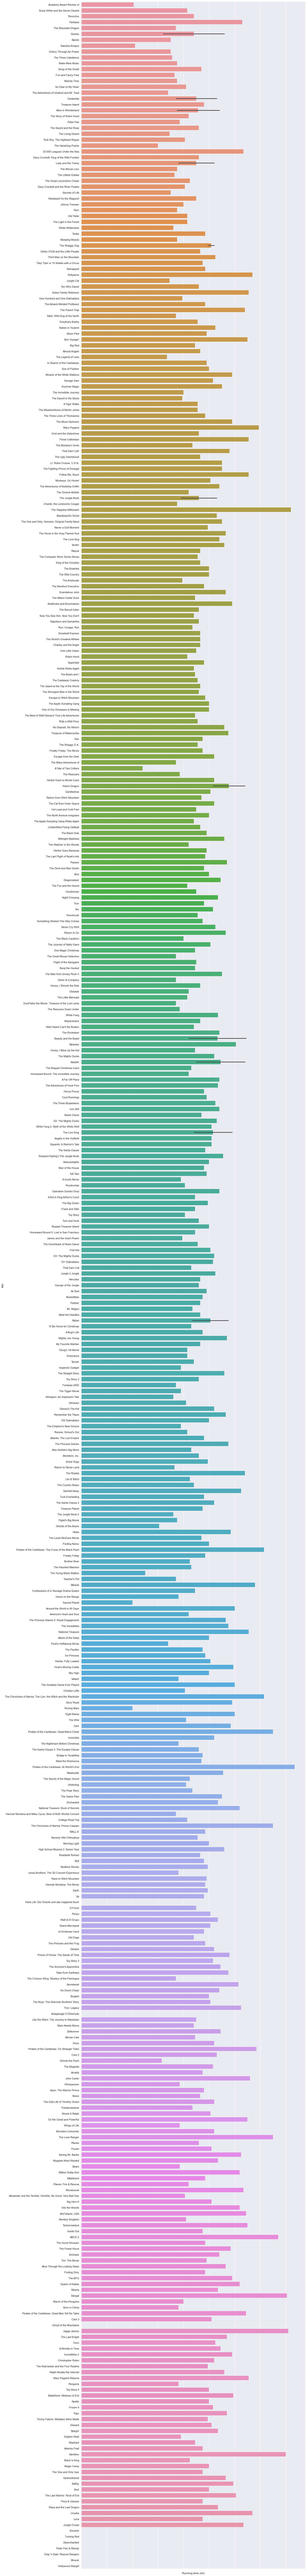

In [53]:
plt.figure(figsize = (17,200))
ax = sns.barplot(x = 'Running time (int)', y = 'title',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

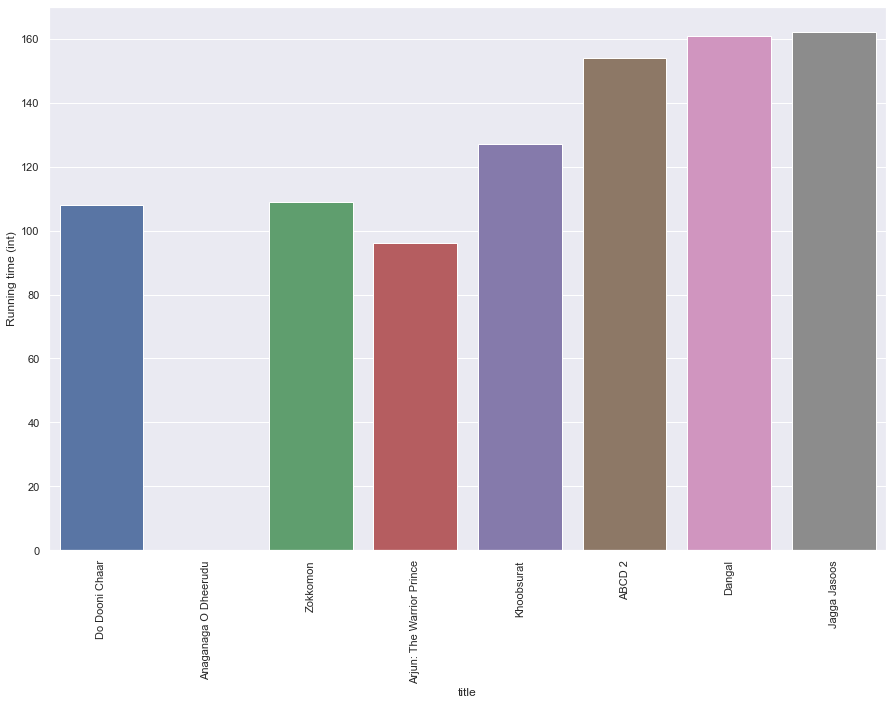

In [54]:
# INDIAN movie 
indian_movie = df[df["Country"]=="India"]
plt.figure(figsize = (15,10))
sns.barplot(x = 'title',y = 'Running time (int)',data = indian_movie)
plt.xticks(rotation=90)
plt.show()

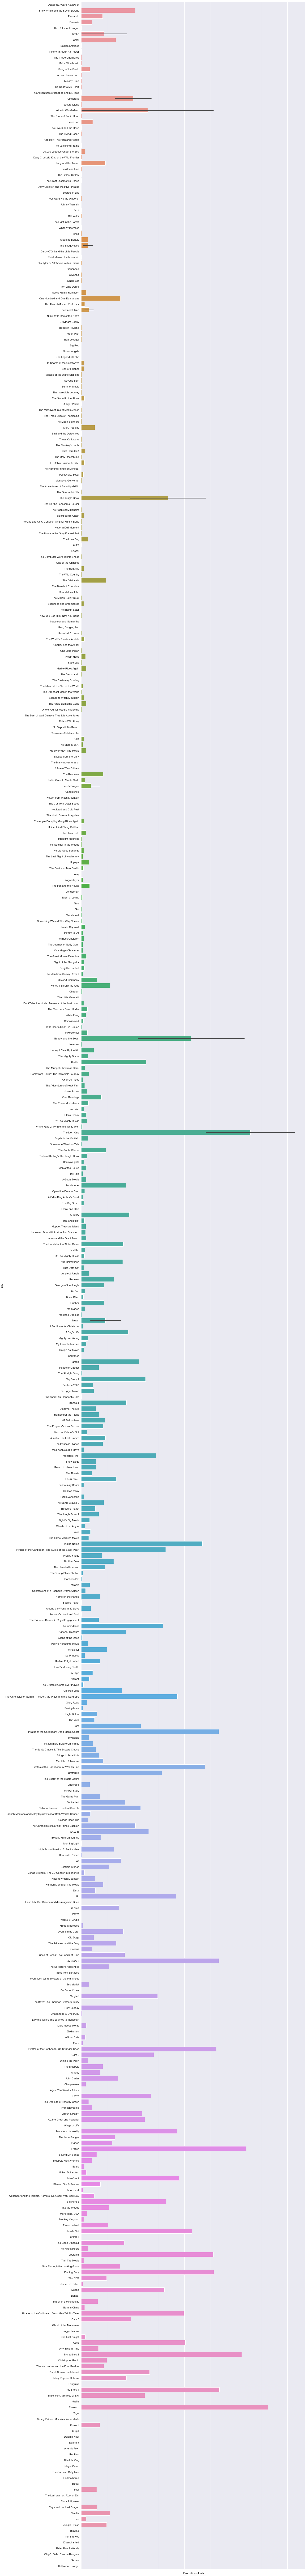

In [55]:
plt.figure(figsize = (17,200))
ax = sns.barplot(x = 'Box office (float)', y = 'title',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

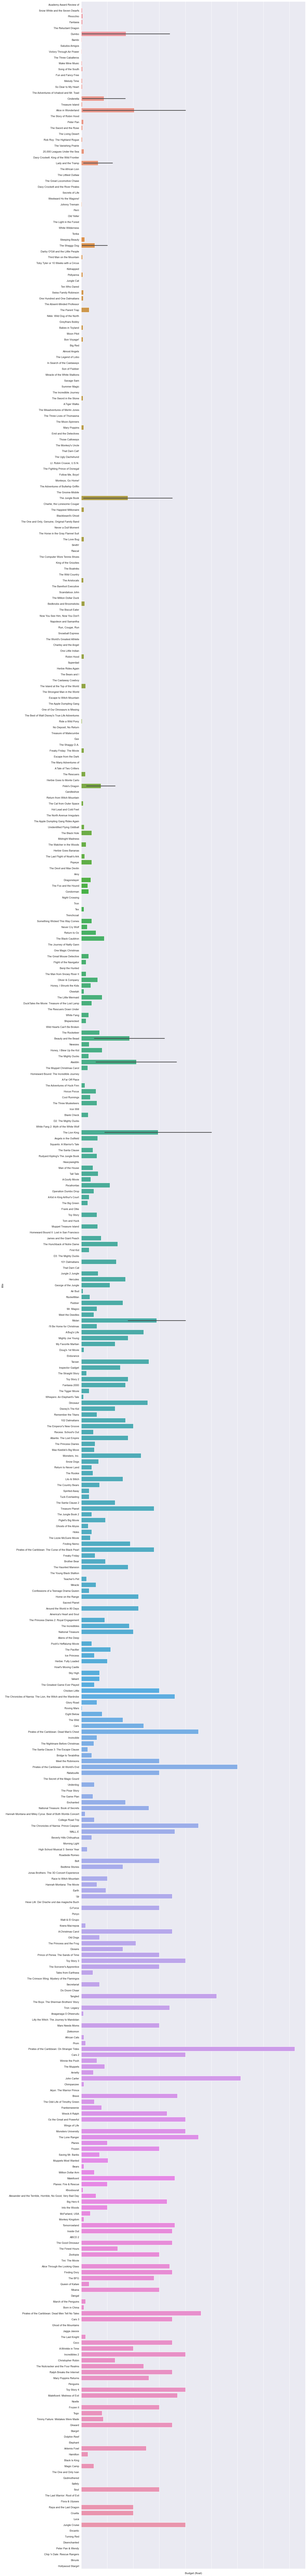

In [56]:
plt.figure(figsize = (17,200))
ax = sns.barplot(x = 'Budget (float)', y = 'title',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()